# Transfer Learning with MobileNetV2

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import pathlib

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.9
Tensorflow version: 2.10.1
Keras version: 2.10.0


## Loading the model

MobileNet v2 models for Keras: https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [2]:
model_0 = tf.keras.applications.MobileNetV2()
print(model_0)

## Analyzing the model

In [3]:
model_0.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [4]:
tf.keras.utils.plot_model(model_0, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [5]:
IMAGE_SIZE = 224
print('IMAGE_SIZE:', IMAGE_SIZE)

IMAGE_SIZE: 224


## Loading the labels

In [6]:
# LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
# labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
# labels = np.array(
#     open(labels_path).read().splitlines()
# )[1:]

labels = ["Ambulance", "Boat", "Cart", "Limousine", "Snowmobile", "Truck", "Barge", "Bus", 
          "Caterpillar", "Motorcycle", "Tank", "Van", "Bicycle", "Car", "Helicopter", "Segway", "Taxi"]

In [7]:
print('Labels shape:', len(labels))

Labels shape: 17


In [8]:
print(labels)

['Ambulance', 'Boat', 'Cart', 'Limousine', 'Snowmobile', 'Truck', 'Barge', 'Bus', 'Caterpillar', 'Motorcycle', 'Tank', 'Van', 'Bicycle', 'Car', 'Helicopter', 'Segway', 'Taxi']


## Loading test images

In [9]:
def load_image(image_path):
    return tf.keras.utils.load_img(
        image_path,
        target_size=(IMAGE_SIZE, IMAGE_SIZE)
    )

In [10]:
def image_to_array(image):
    return tf.keras.preprocessing.image.img_to_array(image, dtype=np.int32)

In [11]:
def display_image(image_np, title=None):
    plt.figure()
    plt.title(str(title) if title else None)
    plt.imshow(image_np)

In [12]:
TEST_IMAGE_PATHS = 'kaggle_dataset/vehicle/test/testset'
TEST_IMAGE_PATHS

'kaggle_dataset/vehicle/test/testset'

In [13]:
test_set = tf.keras.utils.image_dataset_from_directory(
    TEST_IMAGE_PATHS,
    labels=None,
    shuffle=False,
    batch_size = None,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
)

print(test_set)

Found 7958 files belonging to 1 classes.
<PrefetchDataset element_spec=TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None)>


## Try displaying an image from test set

tf.Tensor(
[[[211.      195.      169.     ]
  [211.      195.      169.     ]
  [211.      195.      169.     ]
  ...
  [201.30359 203.30359 192.30359]
  [200.      202.      191.     ]
  [200.      202.      191.     ]]

 [[212.58482 196.58482 170.58482]
  [212.58482 196.58482 170.58482]
  [212.32658 196.32658 170.32658]
  ...
  [204.74916 206.74916 195.74916]
  [203.96205 205.96205 194.96205]
  [203.96205 205.96205 194.96205]]

 [[213.      197.      171.65402]
  [213.      197.      171.65402]
  [212.46097 196.46097 171.11499]
  ...
  [207.18756 209.18756 198.18756]
  [206.96205 208.96205 197.96205]
  [206.96205 208.96205 197.96205]]

 ...

 [[132.18967 142.53564 150.49771]
  [132.18967 142.53564 150.49771]
  [131.75102 142.31015 149.63278]
  ...
  [116.72322 129.73094 134.80576]
  [116.49771 129.84369 134.80576]
  [116.49771 129.84369 134.80576]]

 [[145.11371 155.69855 161.49097]
  [145.11371 155.69855 161.49097]
  [144.46193 155.04677 160.83919]
  ...
  [129.94333 142.61813 145.

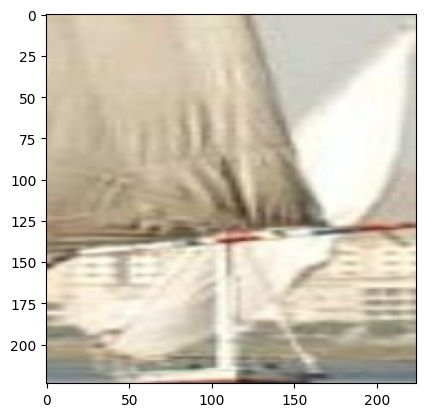

In [14]:
for a in test_set.take(1):
    print(a)
    display_image(a.numpy().astype('uint8'))

In [15]:
TRAIN_IMAGE_PATHS = 'kaggle_dataset/vehicle/train/train'

In [16]:
train_set, validation_set = tf.keras.utils.image_dataset_from_directory(
    TRAIN_IMAGE_PATHS, 
    class_names=labels,
    shuffle=True,
    batch_size = 32,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    label_mode='categorical',
    subset='both',
    validation_split=0.2,
    seed=42,
)

print(train_set)
print(validation_set)

Found 28045 files belonging to 17 classes.
Using 22436 files for training.
Using 5609 files for validation.
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 17), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 17), dtype=tf.float32, name=None))>


## Try displaying an image from train set

tf.Tensor(
[[[109.       132.       138.      ]
  [113.22991  136.2299   142.2299  ]
  [111.02679  134.02678  140.02678 ]
  ...
  [208.66312  214.66312  204.66312 ]
  [195.91986  201.91986  191.91986 ]
  [179.       185.       175.      ]]

 [[109.       132.       138.      ]
  [112.97876  135.97876  141.97876 ]
  [110.95058  133.95058  139.95058 ]
  ...
  [193.88763  199.88763  189.88763 ]
  [181.53394  187.53394  177.53394 ]
  [170.39062  176.39062  166.39062 ]]

 [[109.       132.       138.      ]
  [112.52933  135.52933  141.52933 ]
  [110.81421  133.81421  139.81421 ]
  ...
  [167.4473   173.4473   163.4473  ]
  [155.79071  161.79071  151.79071 ]
  [154.98438  160.98438  150.98438 ]]

 ...

 [[  5.96875   25.96875   34.96875 ]
  [ 18.248709  40.786655  48.940674]
  [ 30.14732   52.40402   64.12054 ]
  ...
  [ 70.78861   95.78861  100.78861 ]
  [ 62.12342   87.12342   91.99589 ]
  [ 60.140625  85.140625  89.3125  ]]

 [[  2.78125   22.78125   31.78125 ]
  [ 16.409492  38.947437  

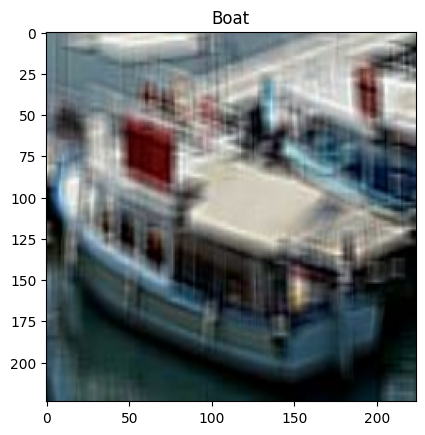

In [17]:
for a, b in train_set.take(1):
    print(a[0])
    print(b[0])
    label = np.array(labels)[b[0].numpy() == 1][0]
    display_image(a[0].numpy().astype('uint8'), title=label)

## Preparing new layers for Transfer Learning

In [18]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE) + (3,)

# Load MobileNetV2 model for transfer learning
model_0 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

#image_batch, label_batch = next(iter(train_set))

#feature_batch = model_0(image_batch)

# Data augmentation layer to reduce overfitting
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

model_0.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
#feature_batch_average = global_average_layer(feature_batch)
#print(feature_batch_average.shape)

inputs = tf.keras.Input(shape=(224, 224, 3))
prediction_layer = tf.keras.layers.Dense(units = 17, activation = "sigmoid")
#prediction_batch = prediction_layer(feature_batch_average)
#print(prediction_batch.shape)

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = model_0(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

## Preview the new model

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

## Train the new model

In [20]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

history = model.fit(train_set, validation_data=validation_set, shuffle=True, epochs=5)

Epoch 1/5
702/702 [==============================] - 111s 140ms/step - loss: 1.4997 - accuracy: 0.5466 - val_loss: 0.8932 - val_accuracy: 0.7495
Epoch 2/5
702/702 [==============================] - 100s 142ms/step - loss: 0.9201 - accuracy: 0.7178 - val_loss: 0.6746 - val_accuracy: 0.8042
Epoch 3/5
702/702 [==============================] - 106s 151ms/step - loss: 0.7919 - accuracy: 0.7545 - val_loss: 0.5949 - val_accuracy: 0.8164
Epoch 4/5
702/702 [==============================] - 106s 150ms/step - loss: 0.7305 - accuracy: 0.7668 - val_loss: 0.5493 - val_accuracy: 0.8288
Epoch 5/5
702/702 [==============================] - 105s 149ms/step - loss: 0.6951 - accuracy: 0.7743 - val_loss: 0.5226 - val_accuracy: 0.8333


## Classify one image

In [21]:
# Combine tags in the format "Label1 (probability1), Label2 (probability2), ..."
def combine_tags(probs):
    probs *= 100
    sorted_indices = sorted(range(len(labels)), key= lambda i: -probs[i])
    return ''.join(f'{labels[i]} ({probs[i]:.2f}%), ' for i in sorted_indices)

tf.Tensor(
[[[211.      195.      169.     ]
  [211.      195.      169.     ]
  [211.      195.      169.     ]
  ...
  [201.30359 203.30359 192.30359]
  [200.      202.      191.     ]
  [200.      202.      191.     ]]

 [[212.58482 196.58482 170.58482]
  [212.58482 196.58482 170.58482]
  [212.32658 196.32658 170.32658]
  ...
  [204.74916 206.74916 195.74916]
  [203.96205 205.96205 194.96205]
  [203.96205 205.96205 194.96205]]

 [[213.      197.      171.65402]
  [213.      197.      171.65402]
  [212.46097 196.46097 171.11499]
  ...
  [207.18756 209.18756 198.18756]
  [206.96205 208.96205 197.96205]
  [206.96205 208.96205 197.96205]]

 ...

 [[132.18967 142.53564 150.49771]
  [132.18967 142.53564 150.49771]
  [131.75102 142.31015 149.63278]
  ...
  [116.72322 129.73094 134.80576]
  [116.49771 129.84369 134.80576]
  [116.49771 129.84369 134.80576]]

 [[145.11371 155.69855 161.49097]
  [145.11371 155.69855 161.49097]
  [144.46193 155.04677 160.83919]
  ...
  [129.94333 142.61813 145.

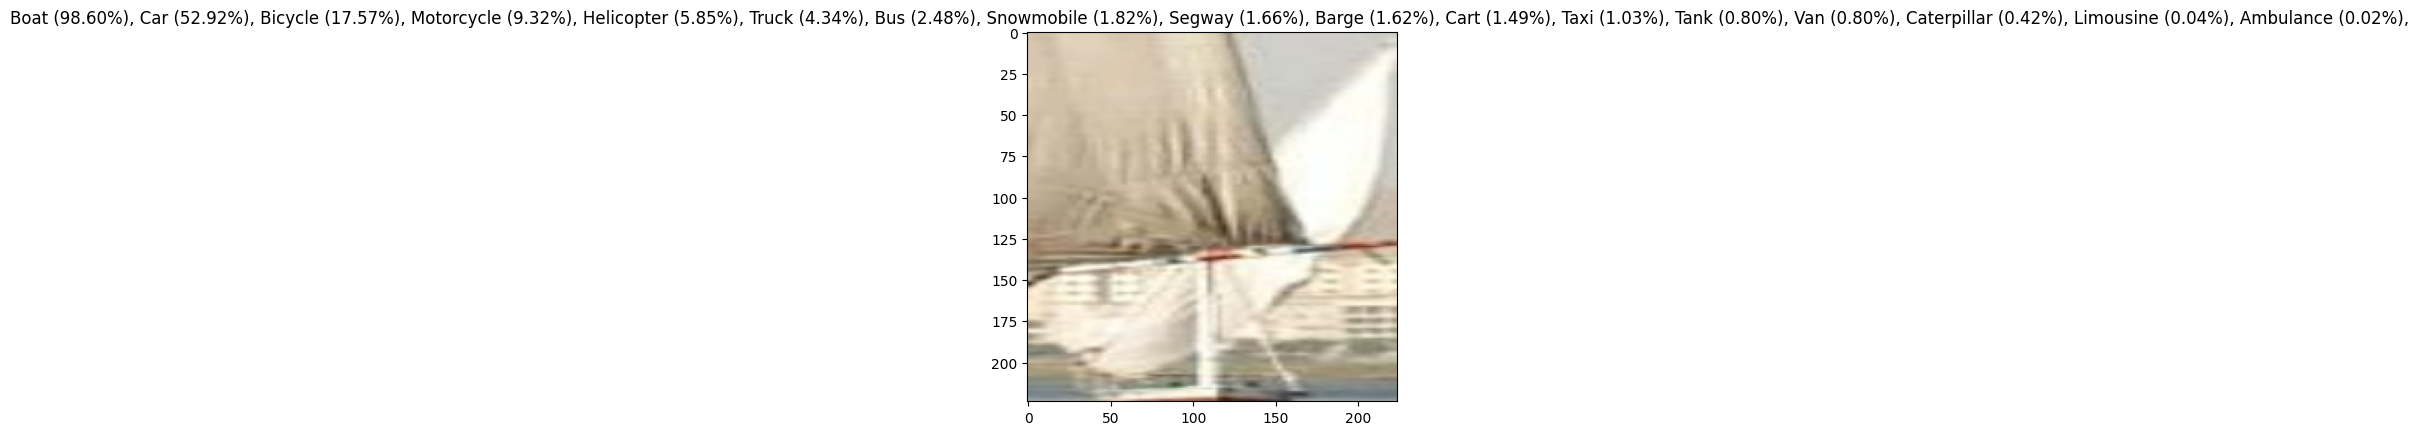

In [22]:
for a in test_set.take(1):
    print(a, '\n', a.shape)
    result = model(a[tf.newaxis, :])
    print(result.shape, '\n', result)
    result = result[0]
    tags = combine_tags(result)
    display_image(a.numpy().astype('uint8'), tags)
    

## Classify many test images

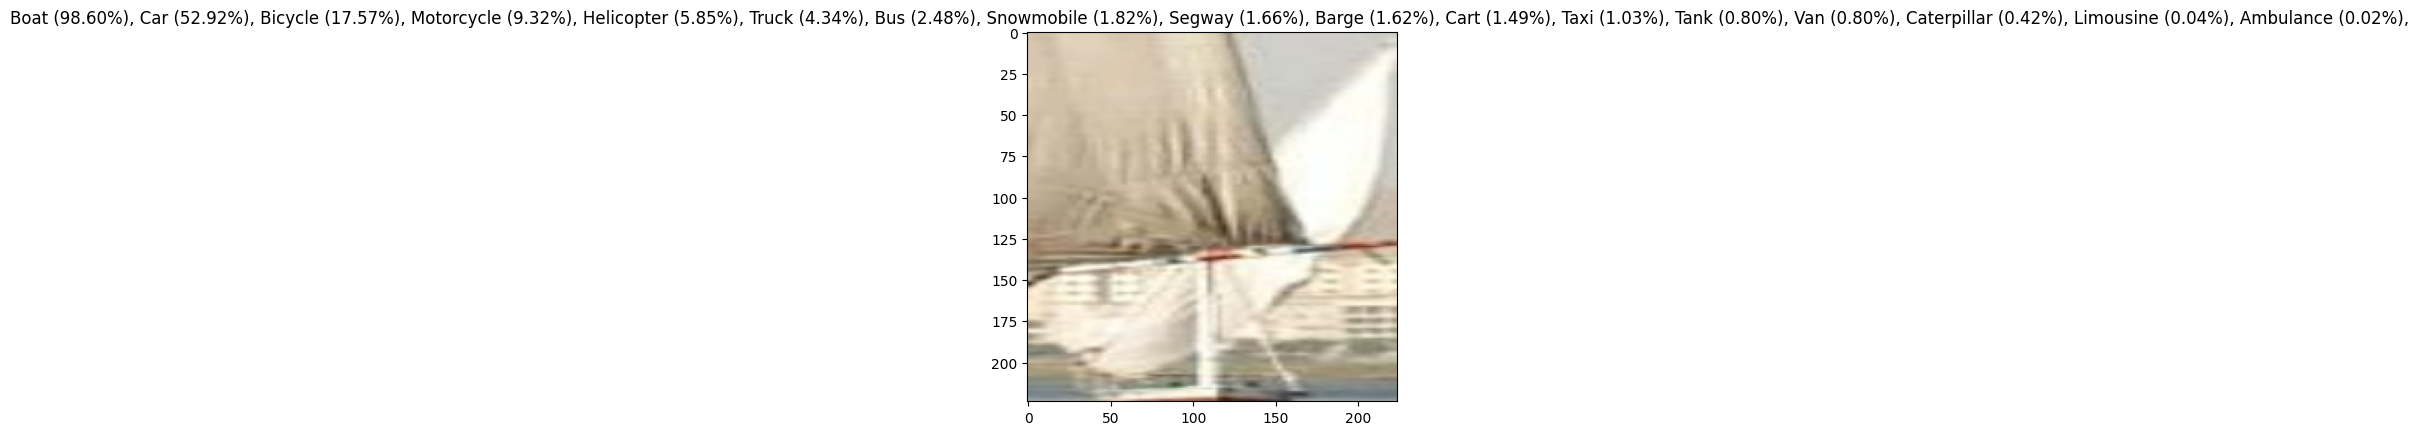

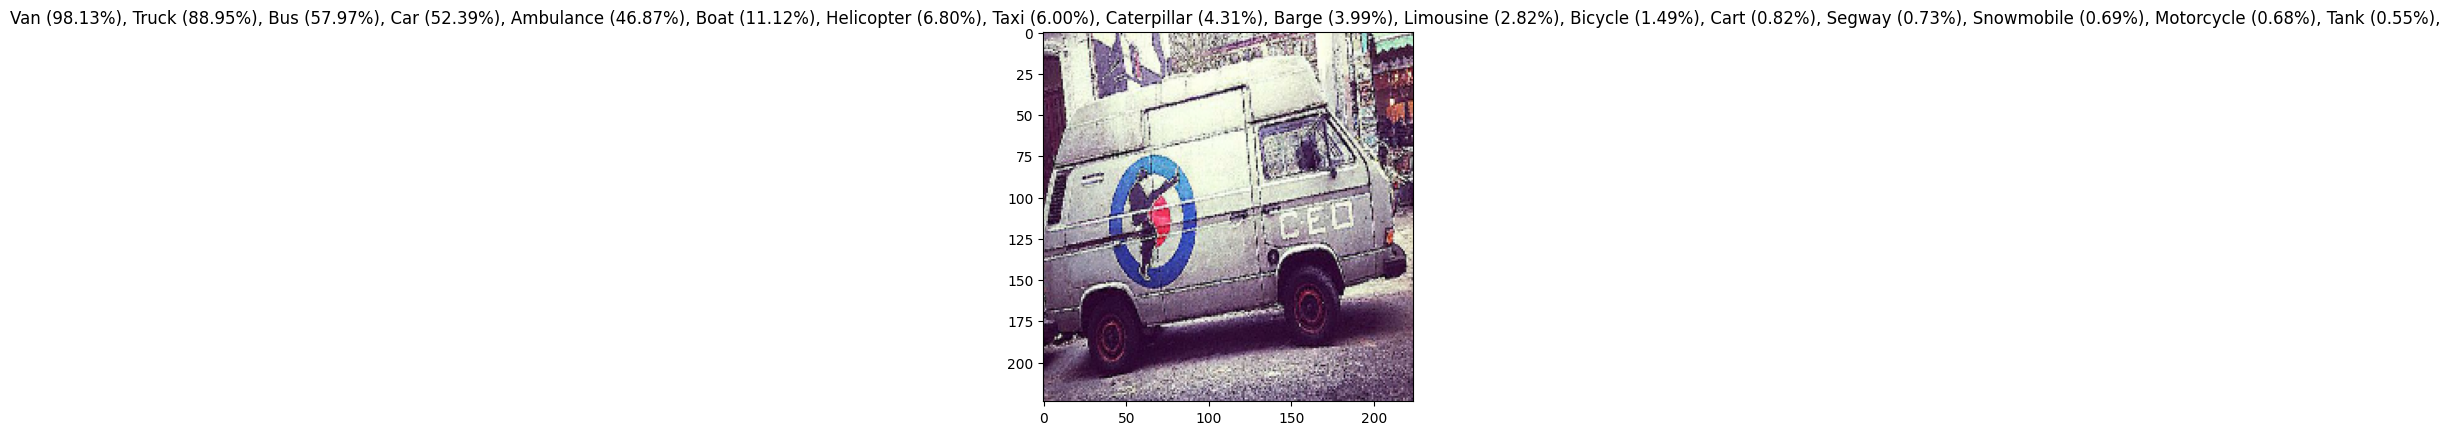

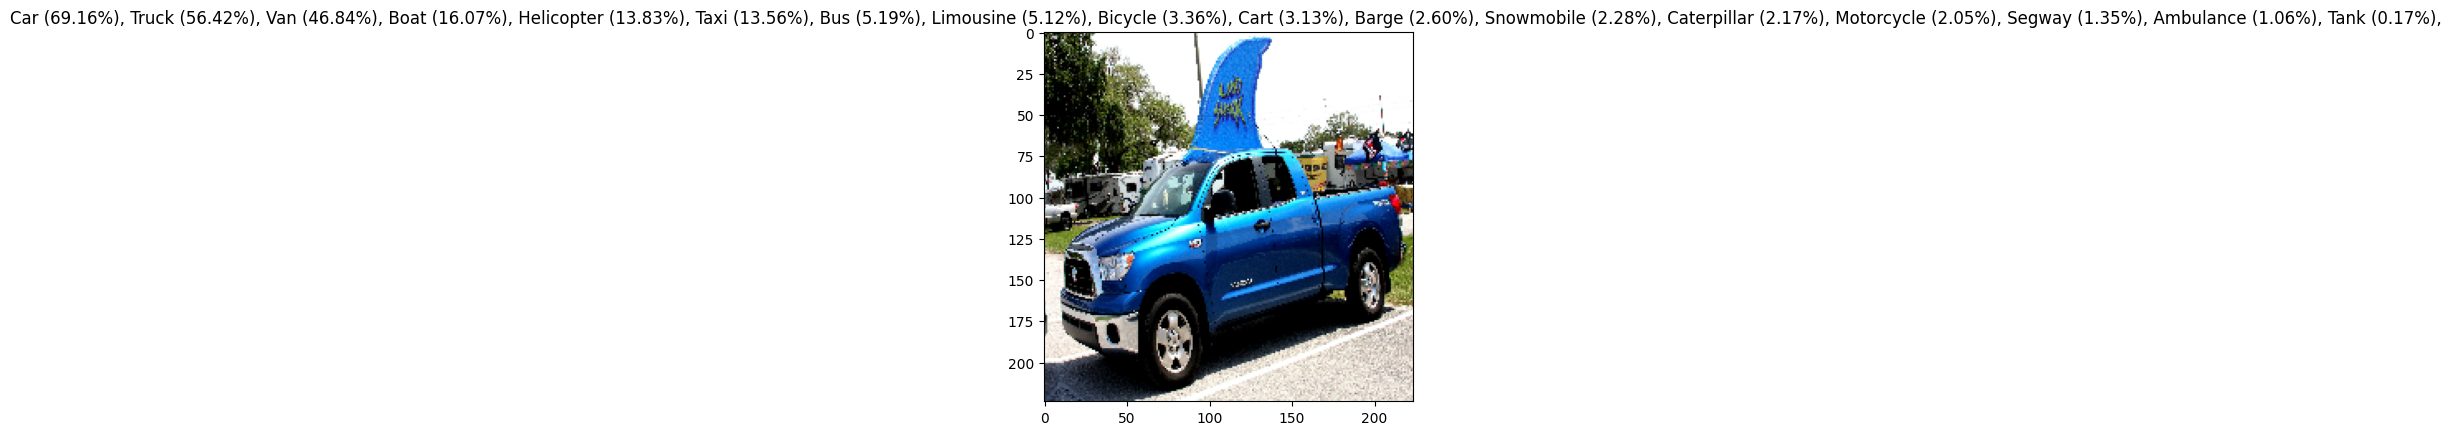

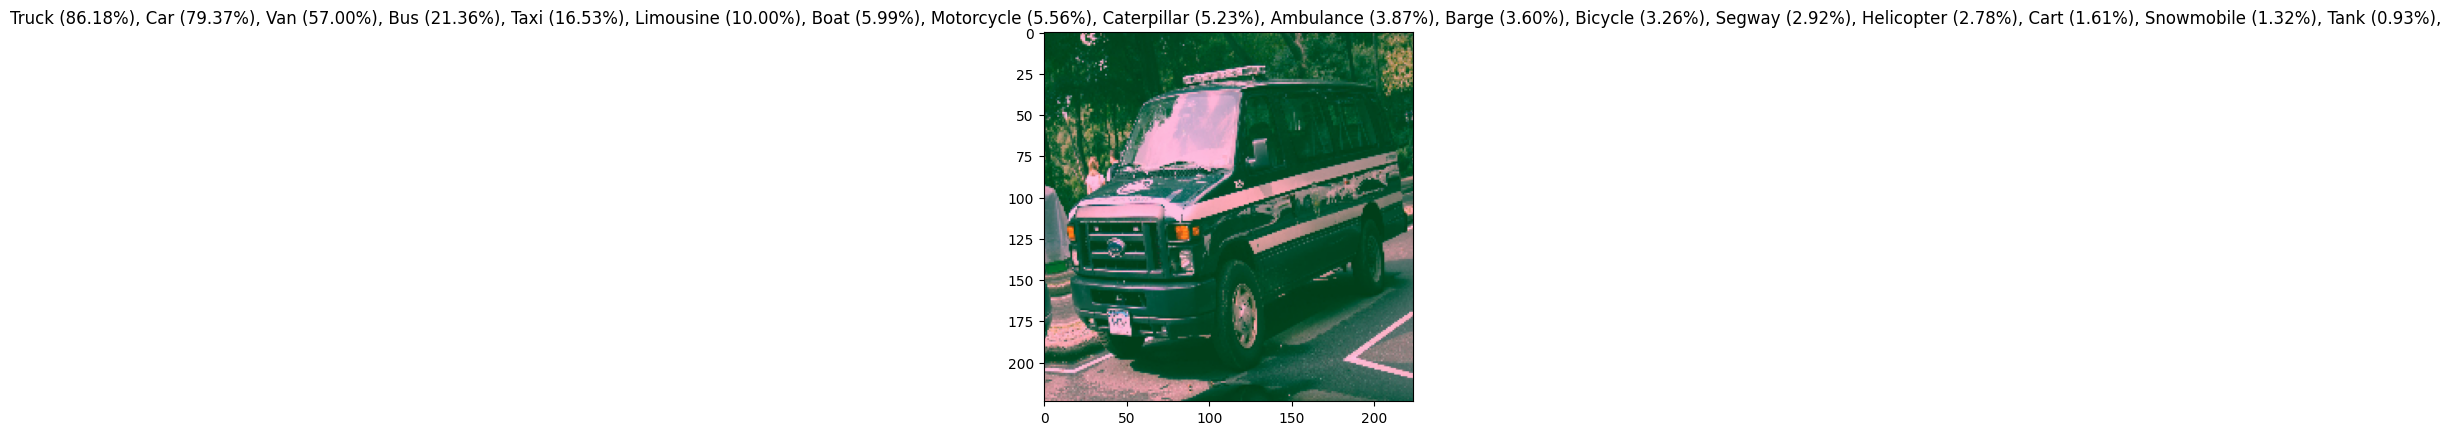

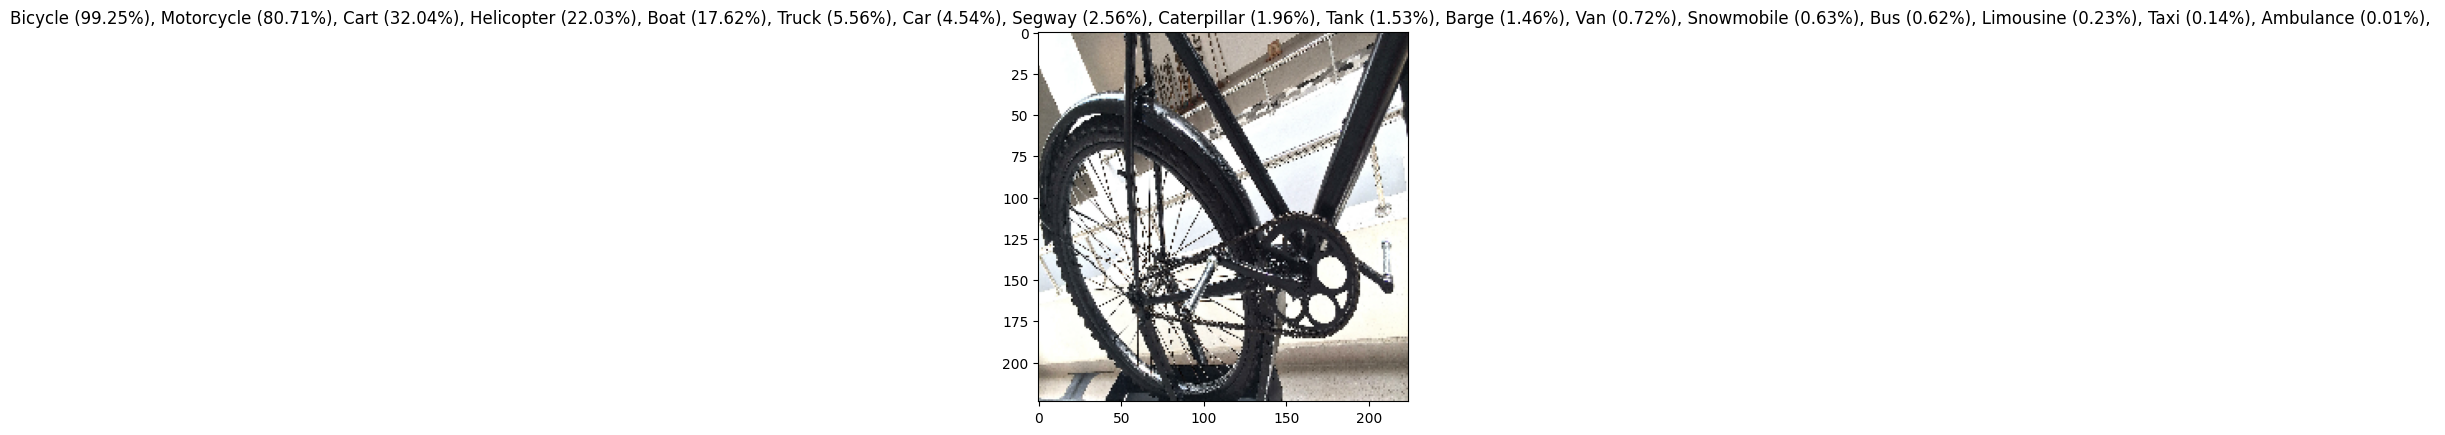

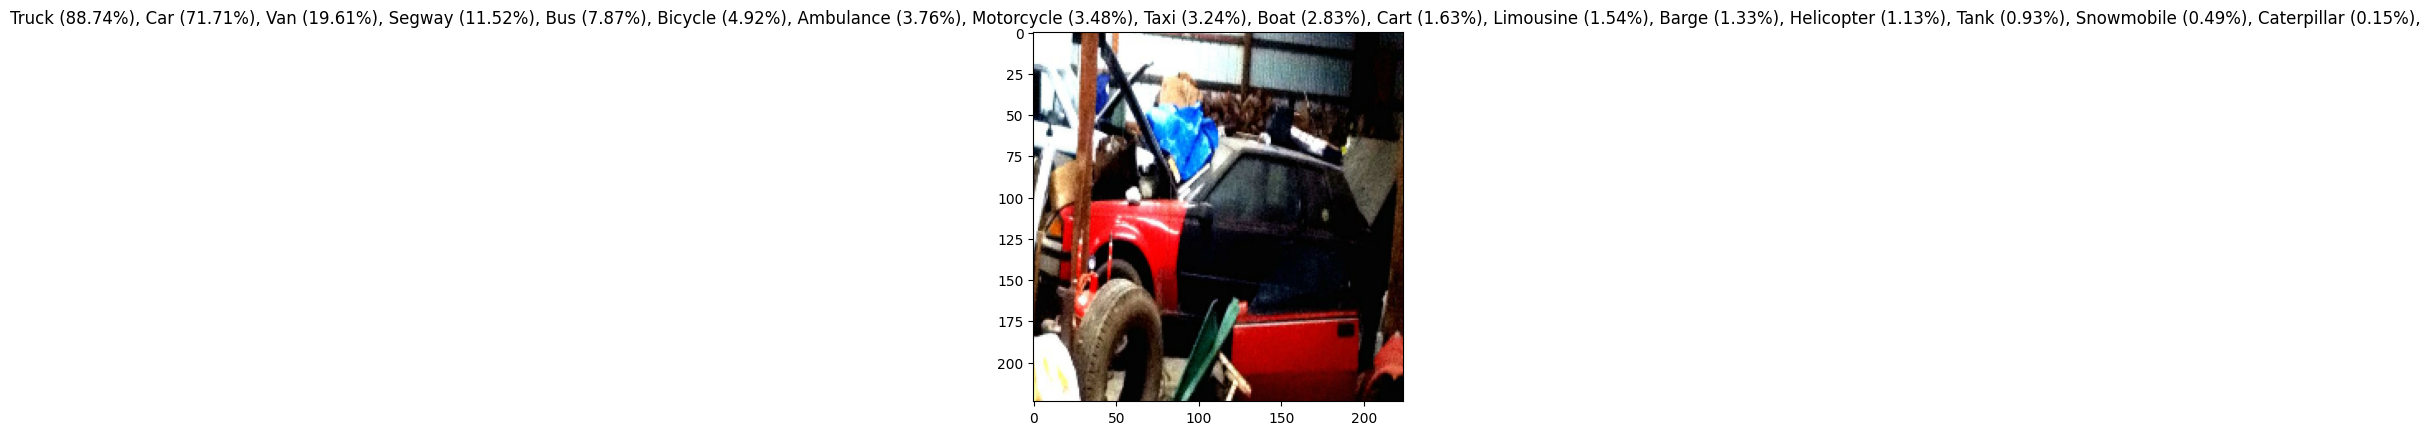

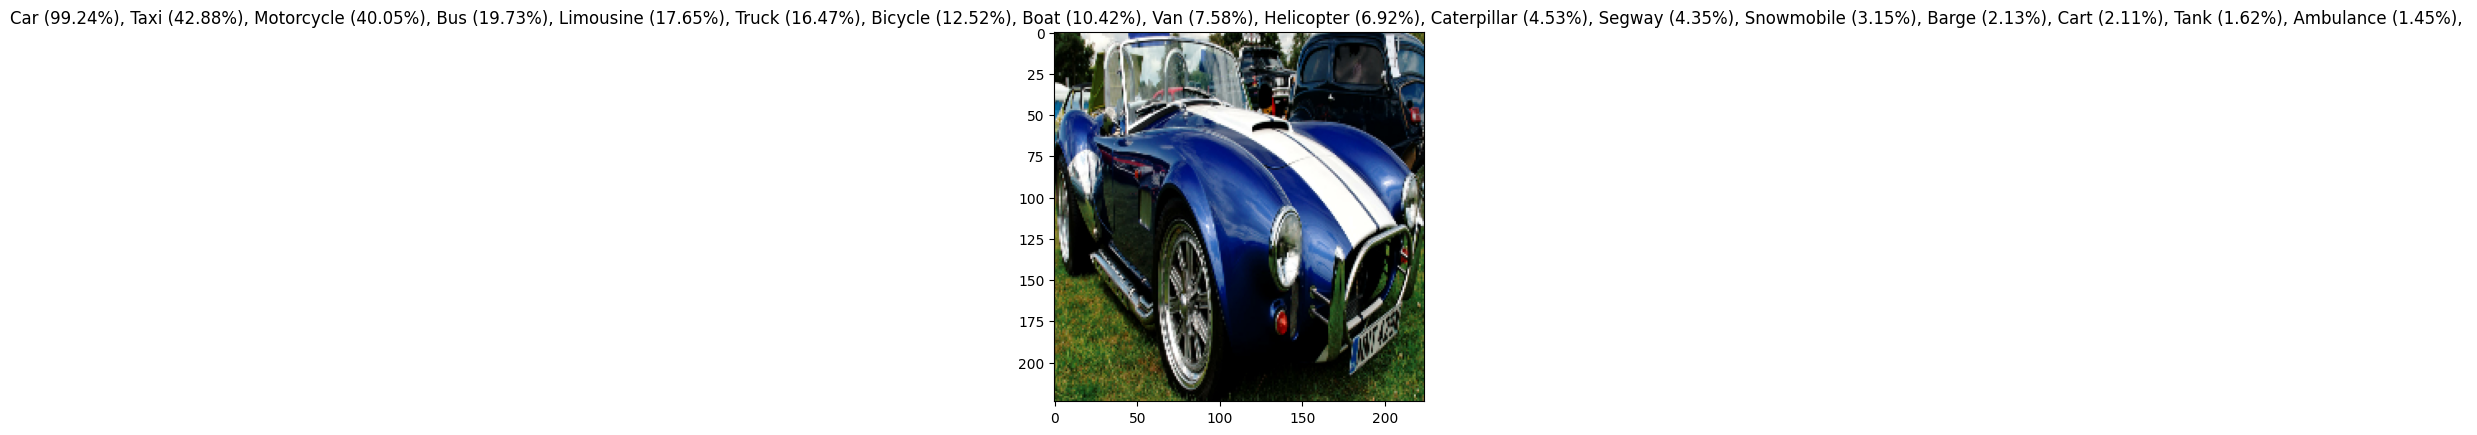

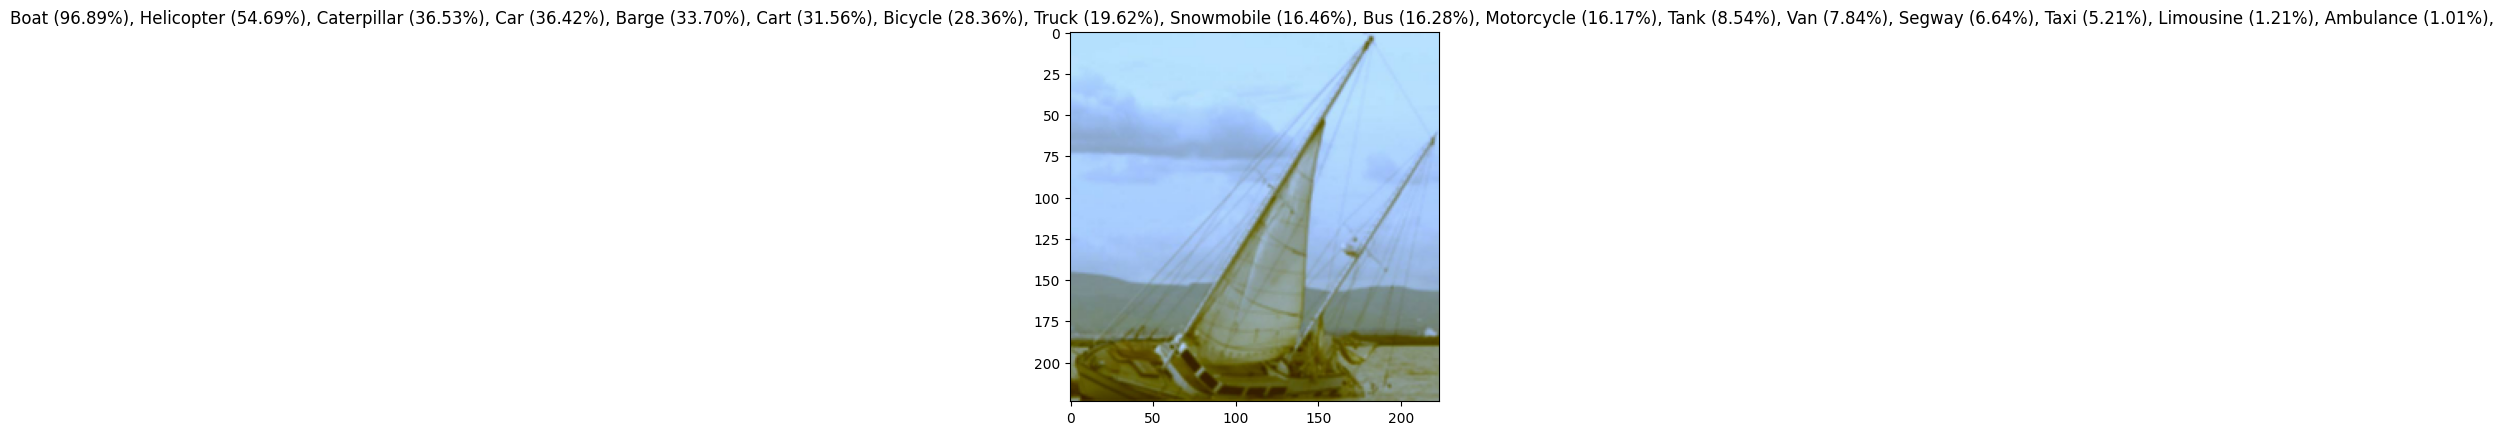

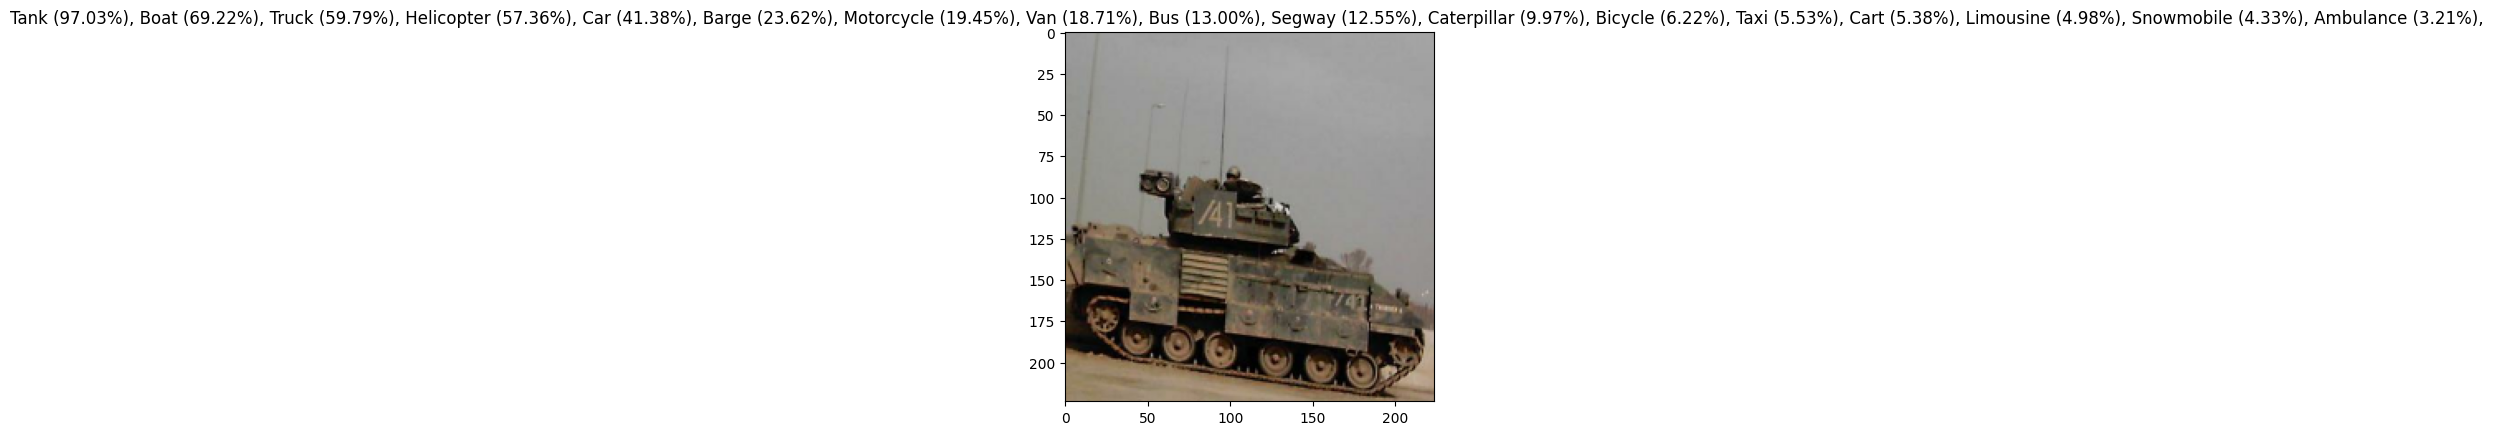

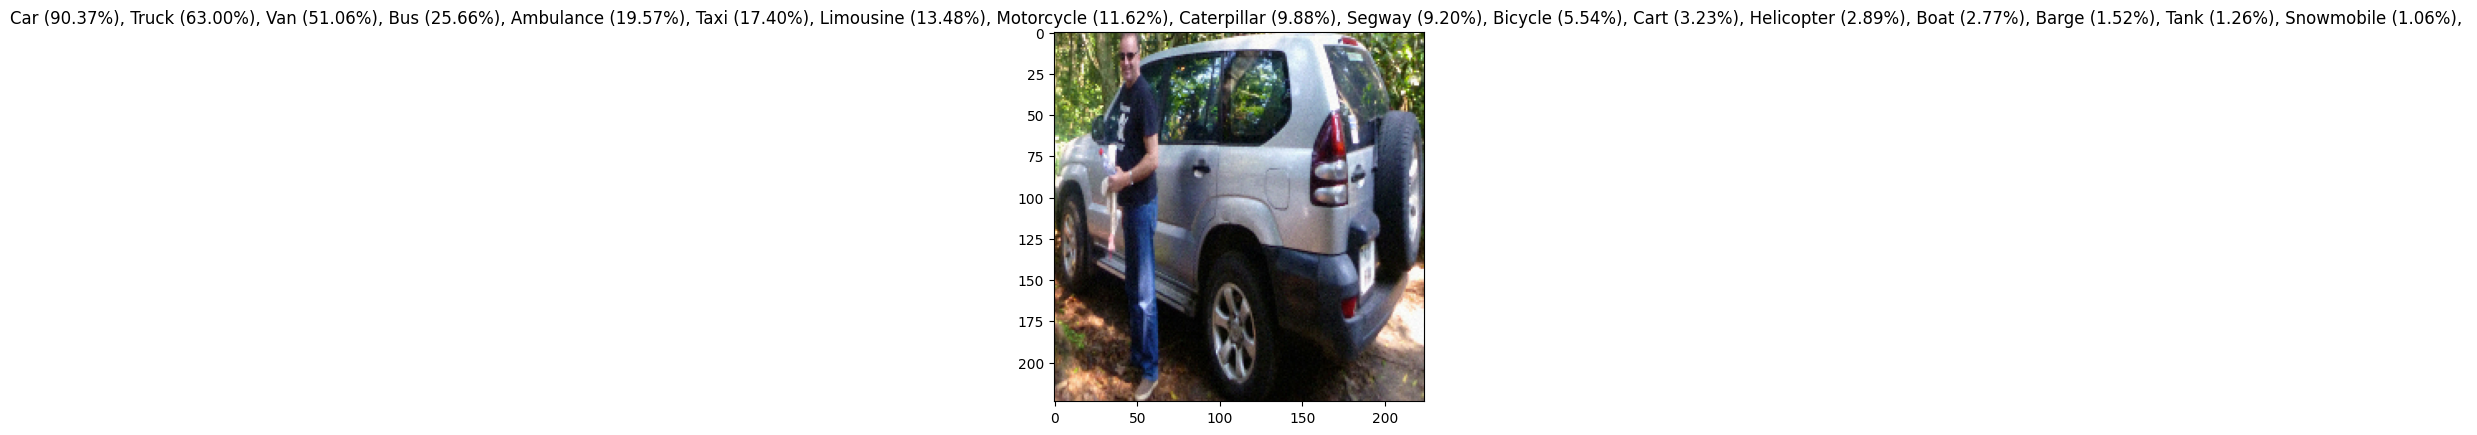

In [23]:
for image in test_set.take(10):
    probabilities = model(image[tf.newaxis, :])
    probabilities = probabilities[0]
    tags = combine_tags(probabilities)
    display_image(image.numpy().astype('uint8'), tags)

## Save the model

In [24]:
model_name = 'image_classification_mobilenet_v2.h5'
model.save(model_name, save_format='h5')

## Prepare a table of predictions of test set to submit to Kaggle competition
(link: https://www.kaggle.com/competitions/vehicle)

In [25]:
submission = np.empty(shape=(len(test_set), 2), dtype=object)
print(submission.shape)

(7958, 2)


In [26]:
for i, path in enumerate(test_set.file_paths):
  filename = os.path.basename(path).split('.')[0][-6:]
  print(filename)
  submission[i, 0] = filename

submission

000000
000001
000002
000003
000004
000005
000006
000007
000008
000009
000010
000011
000012
000013
000014
000015
000016
000017
000018
000019
000020
000021
000022
000023
000024
000025
000026
000027
000028
000029
000030
000031
000032
000033
000034
000035
000036
000037
000038
000039
000040
000041
000042
000043
000044
000045
000046
000047
000048
000049
000050
000051
000052
000053
000054
000055
000056
000057
000058
000059
000060
000061
000062
000063
000064
000065
000066
000067
000068
000069
000070
000071
000072
000073
000074
000075
000076
000077
000078
000079
000080
000081
000082
000083
000084
000085
000086
000087
000088
000089
000090
000091
000092
000093
000094
000095
000096
000097
000098
000099
000100
000101
000102
000103
000104
000105
000106
000107
000108
000109
000110
000111
000112
000113
000114
000115
000116
000117
000118
000119
000120
000121
000122
000123
000124
000125
000126
000127
000128
000129
000130
000131
000132
000133
000134
000135
000136
000137
000138
000139
000140
000141
000142

array([['000000', None],
       ['000001', None],
       ['000002', None],
       ...,
       ['007955', None],
       ['007956', None],
       ['007957', None]], dtype=object)

## Run the model on each image in test_set

In [27]:
for i, test in enumerate(test_set):
    result = model(test[tf.newaxis, :])
    result = result[0]
    tag = max(range(len(labels)), key= lambda i: result[i])
    submission[i, 1] = labels[tag]

In [28]:
import pandas as pd

submission_df = pd.DataFrame(submission, columns=['Id', 'Category'])
submission_df.columns

Index(['Id', 'Category'], dtype='object')

In [29]:
submission_df.head()

Id Category
0  000000     Boat
1  000001      Van
2  000002      Car
3  000003    Truck
4  000004  Bicycle

In [30]:
submission_df.tail()

Id Category
7953  007953      Bus
7954  007954  Bicycle
7955  007955      Van
7956  007956     Boat
7957  007957     Boat

## Export the table to csv, which can be submitted to Kaggle

In [31]:
submission_df.to_csv('kagglesubmission.csv', index=False)